In [1]:
import numpy as np
from colossus.cosmology import cosmology
import os
from matplotlib import pyplot as plt

In [2]:
path_dirout = "../../data/planck15/"
if not os.path.exists(path_dirout):
    os.makedirs(path_dirout)
    print(f"Created folder: {path_dirout}")
else:
    print(f"Folder already exists: {path_dirout}")

path_pk = path_dirout + "pkl_z0.dat"
path_log10pk = path_dirout + "log10pkl_z0.dat"
path_Tk = path_dirout + "Tk_z0.dat"
print(f"Output files: {path_pk}, {path_log10pk}, {path_Tk}")

Folder already exists: ../../data/planck15/
Output files: ../../data/planck15/pkl_z0.dat, ../../data/planck15/log10pkl_z0.dat, ../../data/planck15/Tk_z0.dat


In [3]:
cosmo = cosmology.setCosmology('planck15')
h = cosmo.h
H0 = cosmo.H0 
OmM, OmL = cosmo.Om0, cosmo.Ode0
Omb = cosmo.Ob0
sigma8 = cosmo.sigma8

print(f"h = {h}, H0 = {H0}, OmM = {OmM}, OmL = {OmL}, \n Omb = {Omb}, sigma8 = {sigma8}, ns = {cosmo.ns}")

h = 0.6774, H0 = 67.74, OmM = 0.3089, OmL = 0.6910088292453472, 
 Omb = 0.0486, sigma8 = 0.8159, ns = 0.9667


In [4]:
OmM+OmL+Omb, OmM+OmL

(1.0485088292453473, 0.9999088292453473)

## Linear Matter Power Spectrum

In [5]:
ks = np.logspace(-5, 2, 200)
pks_m0 = cosmo.matterPowerSpectrum(ks, 0)

z=1.2
pks_mz = cosmo.matterPowerSpectrum(ks, z)

In [6]:
sigma8/0.8147

1.001472934822634

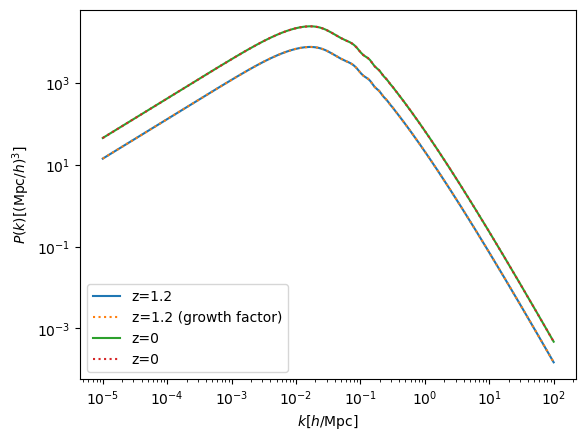

In [7]:
plt.plot(ks, pks_mz, label=f'z={z}')
plt.plot(ks, pks_m0*cosmo.growthFactor(z)**2, ':', label=f'z={z} (growth factor)')
plt.plot(ks, pks_m0, label=f'z=0')
plt.plot(ks, pks_m0/sigma8*0.8147, ':', label=f'z=0')

plt.xlabel(r'$k [h/{\rm Mpc}]$')
plt.xscale('log')
plt.ylabel(r'$P(k) [({\rm Mpc}/h)^3]$')
plt.yscale('log')
plt.legend()

In [8]:
np.savetxt(path_pk, np.column_stack((ks, pks_m0)))
np.savetxt(path_log10pk, np.column_stack((np.log10(ks), np.log10(pks_m0))))   

## Transfer function

2LPT-PNG need to input transfer function. 
It can normalize the transfer function, so we just output the unnormalized transfer function as $$T(k) = \sqrt{\frac{P(k)}{k}}$$

In [9]:
Tk = np.sqrt(pks_m0/ks)
np.savetxt(path_Tk, np.column_stack((ks, Tk)))

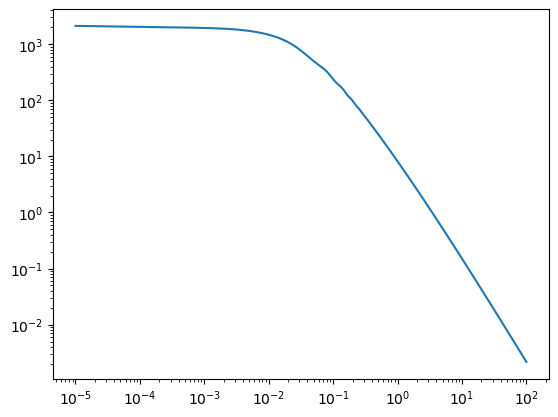

In [10]:
plt.plot(ks, Tk)
plt.yscale('log')
plt.xscale('log')